# Exploratory Data Analysis on 2020 CDC Heart Disease Data

Before diving into the machine learning part on this dataset, we first do some exploratory data analysis to gain some understanding of the data. 

Originally, the dataset comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents.The most recent dataset (as of February 15, 2022) includes data from 2020. The vast majority of columns are key indicators of heart disease, such as obesity (high BMI), diabetic status, drinking too much alcohol, etc.


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart_2020.csv")
df.head() #shows the first 5 rows of the dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.shape #size of the dataset

(319795, 18)

In [18]:
missing_cnt = df.isnull().sum()
print(missing_cnt)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


There is no missing value.

## Analyze of each variable

Since the dataset specially examines heart disease status, so we start by graphing counts for those who have heart disease those who not have.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

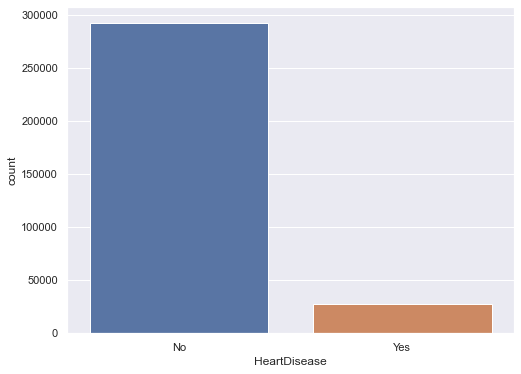

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x = "HeartDisease", data = df)

In [27]:
cnt_have_disease = len(df[df['HeartDisease']=='Yes'])
print(f'Percentage of people having heart disease: {round(cnt_have_disease/len(df),2)}')

Percentage of people having heart disease: 0.09


The ratio of people who have heart disease to those who do not have is about 1:10. Therefore, the dataset is imbalanced.

Text(0.5, 1.0, 'Distribution of BMI by Heart Disease Status')

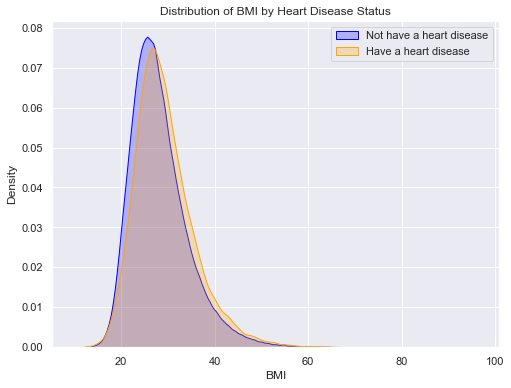

In [73]:
#Distribution of BMI
plt.figure(figsize=(8,6))
ax = sns.kdeplot(df.BMI[df["HeartDisease"] == 'No'],
                color="Blue", shade = True)
ax = sns.kdeplot(df.BMI[df["HeartDisease"] == 'Yes'],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('BMI')
ax.set_title("Distribution of BMI by Heart Disease Status")

We can see that the distributions of BMI for people having heart disease and not having heart disease are almost superposition. Both distributions are slightly right-skewed. The mean of BMI for those not having heart disease is less than the mean of having heart disease.

<AxesSubplot:xlabel='Smoking', ylabel='Percentage'>

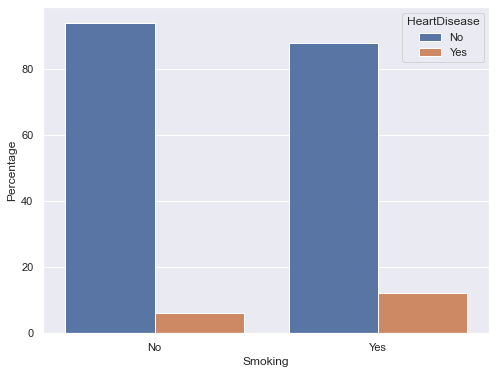

In [69]:
#HeartDisease by Smoking
df_perc = df.groupby('Smoking')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Smoking')

plt.subplots(figsize=(8,6))
sns.barplot(x='Smoking', y='Percentage', hue='HeartDisease', data=df_perc)

The above graph shows that people with smoking habit have higher percentage of having heart disease.

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='Percentage'>

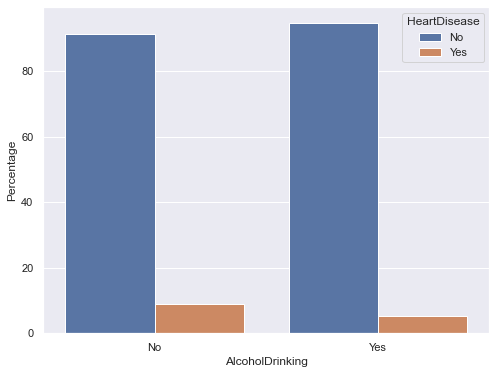

In [70]:
#HeartDisease by AlcoholDrinking
df_perc = df.groupby('AlcoholDrinking')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('AlcoholDrinking')

plt.subplots(figsize=(8,6))
sns.barplot(x='AlcoholDrinking', y='Percentage', hue='HeartDisease', data=df_perc)

Surprisingly, the above graph shows that people with drinking habit have lower percentage of having heart disease.

<AxesSubplot:xlabel='Stroke', ylabel='Percentage'>

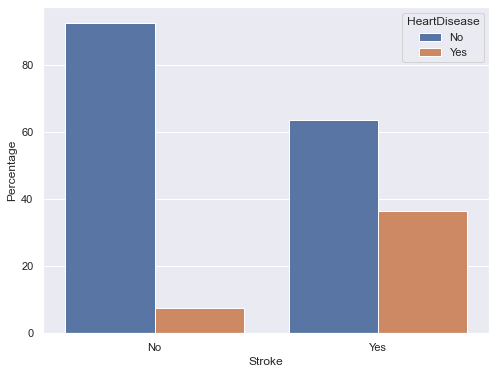

In [71]:
#HeartDisease by Stroke Status
df_perc = df.groupby('Stroke')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Stroke')

plt.subplots(figsize=(8,6))
sns.barplot(x='Stroke', y='Percentage', hue='HeartDisease', data=df_perc)

There is a huge difference between people who had and hadn’t had a Stroke, demonstrating that this variable is an important factor for indicating if a person has heart disease.

<AxesSubplot:xlabel='DiffWalking', ylabel='Percentage'>

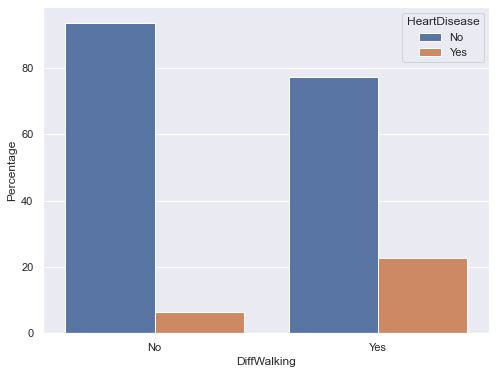

In [74]:
#Diffculty walking
df_perc = df.groupby('DiffWalking')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('DiffWalking')

plt.subplots(figsize=(8,6))
sns.barplot(x='DiffWalking', y='Percentage', hue='HeartDisease', data=df_perc)

As happened with the variable "Stroke", the difficulty of walking is a relevant factor that contributes to a heart disease condition.

<AxesSubplot:xlabel='Sex', ylabel='Percentage'>

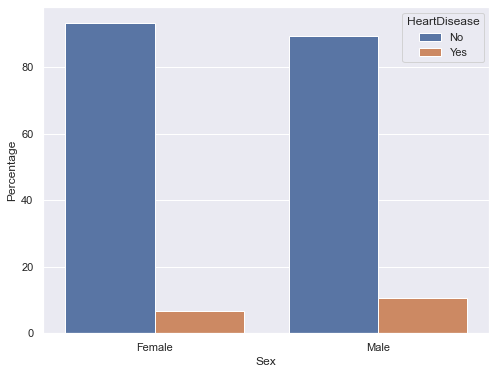

In [75]:
#HeartDisease by Sex
df_perc = df.groupby('Sex')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Sex')

plt.subplots(figsize=(8,6))
sns.barplot(x='Sex', y='Percentage', hue='HeartDisease', data=df_perc)

The above plot shows that men have higher chance of having heart disease.

<AxesSubplot:xlabel='AgeCategory', ylabel='Percentage'>

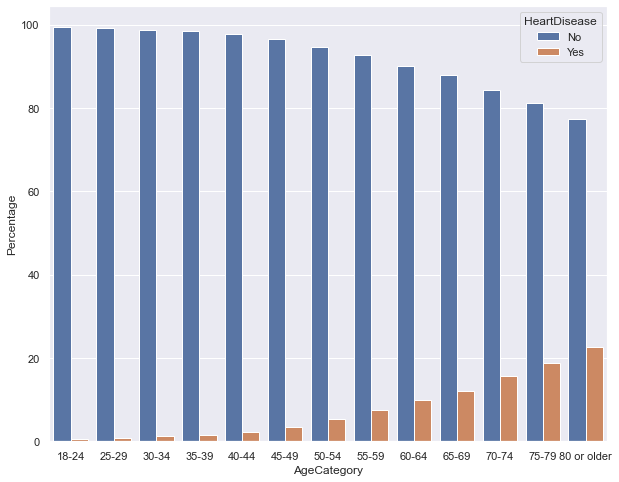

In [77]:
#HeartDisease by Age
df_perc = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('AgeCategory')

plt.subplots(figsize=(10,8))
sns.barplot(x='AgeCategory', y='Percentage', hue='HeartDisease', data=df_perc)

The above plot shows that as the person grows older, the higher the chance for having heart disease. The graph also shows a perceptible exponential growth for the prospective of having heart disease.

<AxesSubplot:xlabel='Race', ylabel='Percentage'>

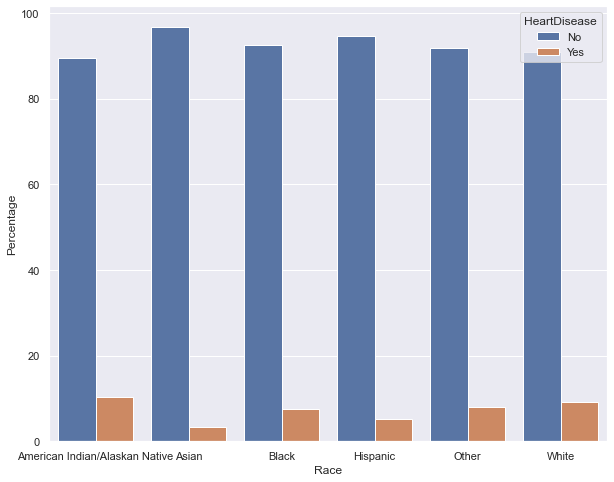

In [78]:
#HeartDisease by Race
df_perc = df.groupby('Race')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Race')

plt.subplots(figsize=(10,8))
sns.barplot(x='Race', y='Percentage', hue='HeartDisease', data=df_perc)

From the plot, we can see that there is no significance different in between each race. Asian people seem to be less susceptible for having heart disease in comparison with other categories. In contrast, American Indian/Alaskan has a considerable tendency of heart disease.

<AxesSubplot:xlabel='Diabetic', ylabel='Percentage'>

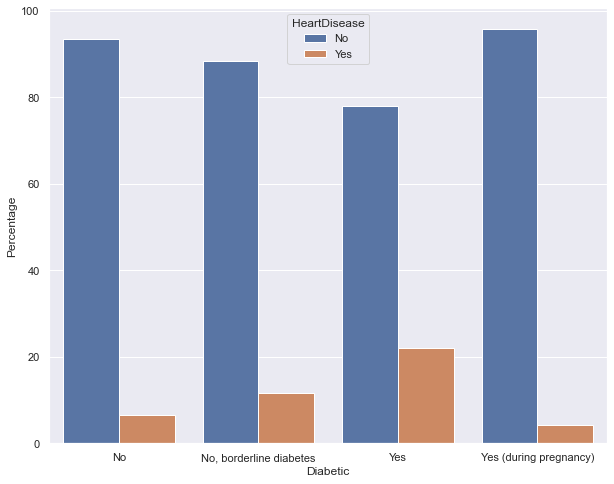

In [79]:
#Diabetes
df_perc = df.groupby('Diabetic')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Diabetic')

plt.subplots(figsize=(10,8))
sns.barplot(x='Diabetic', y='Percentage', hue='HeartDisease', data=df_perc)

Diabetes seems to be a relevant factor for the prevalence of having heart disease, with borderline diabetes having an intermediate pattern between having and not having diabetes. Gestational diabetes doesn't seem to be a risk factor compared with other types of diabetes.

<AxesSubplot:xlabel='PhysicalActivity', ylabel='Percentage'>

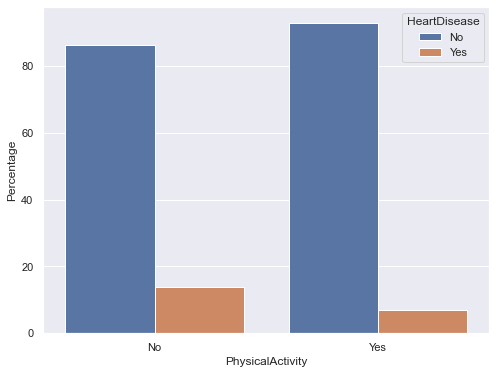

In [81]:
#Physical Activity
df_perc = df.groupby('PhysicalActivity')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('PhysicalActivity')

plt.subplots(figsize=(8,6))
sns.barplot(x='PhysicalActivity', y='Percentage', hue='HeartDisease', data=df_perc)

People with less Physical Activity tend to be more propitious to acquire heart disease.

<AxesSubplot:xlabel='GenHealth', ylabel='Percentage'>

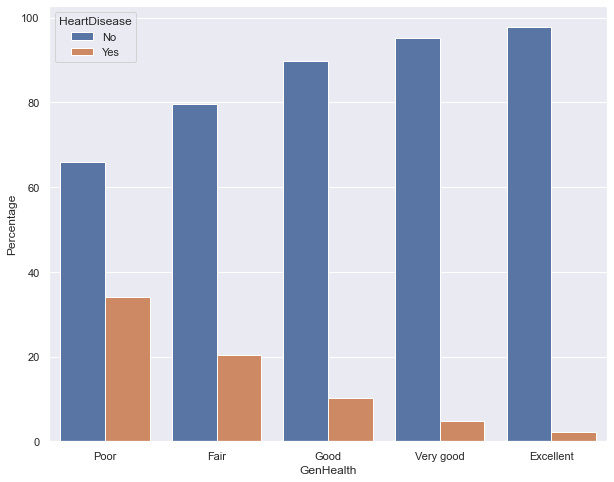

In [83]:
#General Health
df_perc = df.groupby('GenHealth')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('GenHealth')

plt.subplots(figsize=(10,8))
order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
sns.barplot(x='GenHealth', y='Percentage', hue='HeartDisease', data=df_perc, order=order)

The graph above shows that a better health condition minimizes the chance of a person acquiring heart disease.